# Algoritmos Não Supervisionados

O grupo de algoritmos não supervisionados inclui todos aqueles que utilizam Machine Learning em dados de entrada que não tenham um output ou uma label definida, na espera que o **algoritmo extraia conheicmento daqueles dados**. Nesse capítulo, veremos dois tipos de aprendizado não supervisionado:
* **Transformações não supervisionadas**
    * São algoritmos que criam uma nova representação dos dados que facilite para humanos ou algoritmos de machine learning entender (quando comparado com os dados origininais). Nesse grupo entram redusões do número de dimensões (como PCA).
* **Modelos de clustering**
    * Agrupam conjuntos de dados que possuem features parecidas. Pode ser usado por identificar grupos de clientes, por exemplo.
<br>

Um dos maiores **desafios** do aprendizado não supervisionado **é avaliar se o algoritmo realmente aprendeu algo de útil**. Como não existem labels ou outputs realmente esperadas, é complicado afirmar se o modelo foi bem ou teve uma "acurácia" decente. 
<br>
Por causa disso, algoritmos não supervisionados tendem a ser usados mais em análises exploratórias, quando queremos conhecer e entender os dados melhor. Além disso, alguns desses algoritmos também são bastante usados no preprocessamento dos dados pra algoritmos supervisionados. Vamos começar pelos últimos.

## Pré-Processamento e Escalonamento

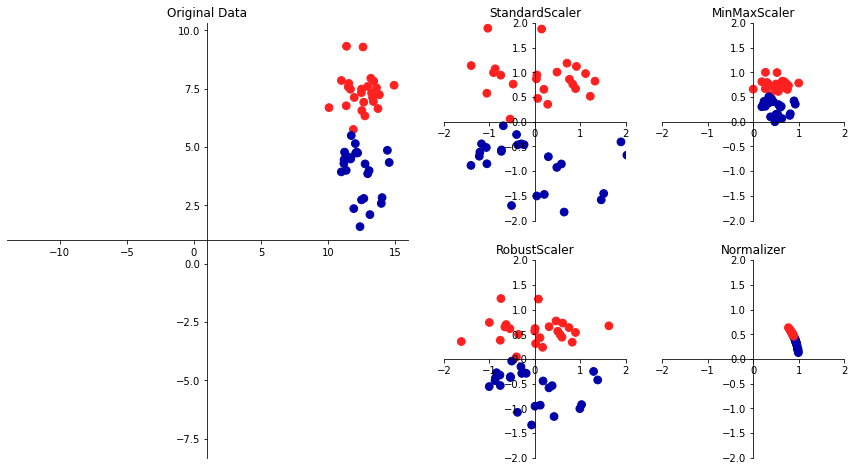

In [1]:
# Importando as libs que vamos utilizar
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()

Em alguns algoritmos mais sensíveis (como SVMs e Neural Networks) do capítulo passado, tivemos que aplicar alguns algoritmos de escalonamento para que os dados pudessem ser utilizados. Funções do scikit-learn como `MinMaxScaler` e `StandardScaler` são consideradas algoritmos de aprendizado não supervisionado. 
<br>
Na imagem acima, podemos ver como ficam os dados após o uso de cada uma das funções nos dados originais.
* O `StandardScaler` faz com que todos os dados tenham média = 0 e variancia = 1, fazendo todos os valores terem a mesma magnitude mas não aplicando nenhum valor máximo ou mínimo.
* O `RobustScaler` usa propriedades estatísticas, como a mediana e os quartis, para garantir que os dados estejam na mesma escala. Pode acabar ignorando dados outliers.
* O `MinMaxScaler` funciona transformando todas as features para que possuam valor máximo = 1 e minímo = 0.
* O `Normalizer` escala cada um dos elementos de forma que o vetor da feature tenha a distância Euclidiana = 1 (faz isso projetando o dado em um círculo - no caso de 2 features - de raio = 1. 
<br>

No último capítulo, aplicamos o `MinMaxScaler` e o `StandardScaler`. Vamos verificar os efeitos dos outros:

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [3]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(X_train)

X_train_scaled = scaler.transform(X_train)

print(f"Mínimo per feature pré escalonamento:\n {X_train.min(axis=0)}")
print(f"Máximo per feature pré escalonamentog:\n {X_train.max(axis=0)}")
print(f"Mínimo per feature pós escalonamento:\n {X_train_scaled.min(axis=0)}")
print(f"Máximo per feature pós escalonamento:\n {X_train_scaled.max(axis=0)}")

Mínimo per feature pré escalonamento:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Máximo per feature pré escalonamentog:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
Mínimo per feature pós escalonamento:
 [5.51189319e-03 4.56825580e-03 3.63962422e-02 3.76233264e-01
 2.17902707e-05 2.37805701e-05 0.00000000e+00 0.00000000e+00
 4.14296567e-05 1.13032004e-05 1.38230416e-04 2.22630519e-04
 8.95949678e-04 1.14342671e-02 1.22062858e-06 2.76335624e-06
 0.00000000e+00 0.00000000

É importante que a **exata mesma transformação feita no set de treino seja feita no set de teste** para que a aplicação de modelos supervised learning funcione, por motivos óbvios. Supondo que o valor máximo de uma feature no set de treinamento seja diferente do valor máximo no set de testes... fácil de ver o que pode acontecer caso usassemos o `MinMaxScaler`.
<br>

Ao invés de usar de usar o fit e, em seguida, o transform, podemo susar o `scaler.fit_transform()` que, em geral, é mais eficiente que usar ambos separados.
<br>

No capítulo passado, vimos também como o escalonamento correto faz grandes diferenças quando usado em modelos que precisam dele, como é o caso dos SVMs.

## Redução de Dimensionalidade, Extração de Features e Aprendizado Manifold

### PCA

Transformar os dados usando algoritmos não supervisionados pode ter várias motivações, como melhorar a visualização, comprimir os dados ou transforma-los em algo mais útil para algum uso específico. 
<br>
Um dos algoritmos mais utilizados é o PCA, ou análise de componente principal. 

O canal statquest tem um vídeo excelente mostrando como essa transformação funciona:
https://www.youtube.com/watch?v=FgakZw6K1QQ

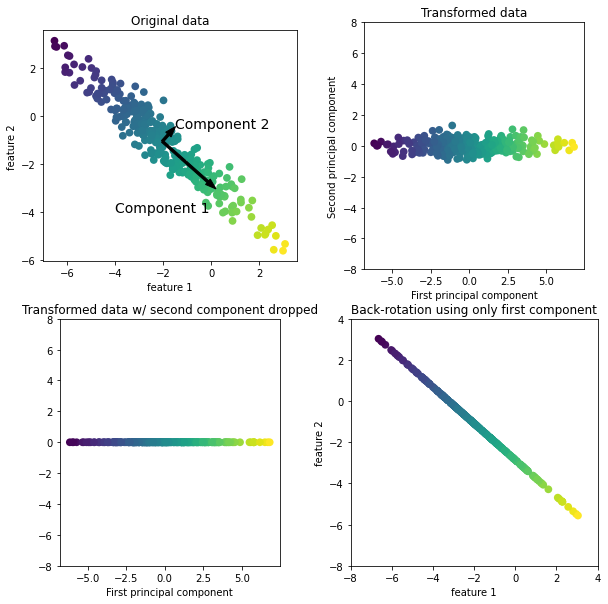

In [4]:
mglearn.plots.plot_pca_illustration()

O PCA é um método que rotaciona o dataset numa forma que as features que foram rotacionadas são estaticamente não correlacionadas. Além disso, geralmente **é reduzido o número de features**, selecionando apenas aquelas que tem **maior importância na explicação dos dados**.
<br>

Inicialmente, o PCA procura um vetor que aponte para a direção da maior variância (no plot, é o componente 1). Em seguida, localiza um vetor mais informativo que é ortogonal ao primeiro vetor (nos dados acima, só existe essa opção. Em um dataset com mais features, as opções de ângulo ortogonal são infinitas). São esses os vetores (ou componentes) que dão o nome a transformação.
<br>

Como dito anteriormente, podemos usar o PCA para visualizar datasets de muitas dimensões. Utilizando o dataset do câncer de mama, por exemplo, que possui 30 features. Uma forma de fazer isso é usando 30 histogramas comparando ambas as classes de câncer (maligno ou benigno).

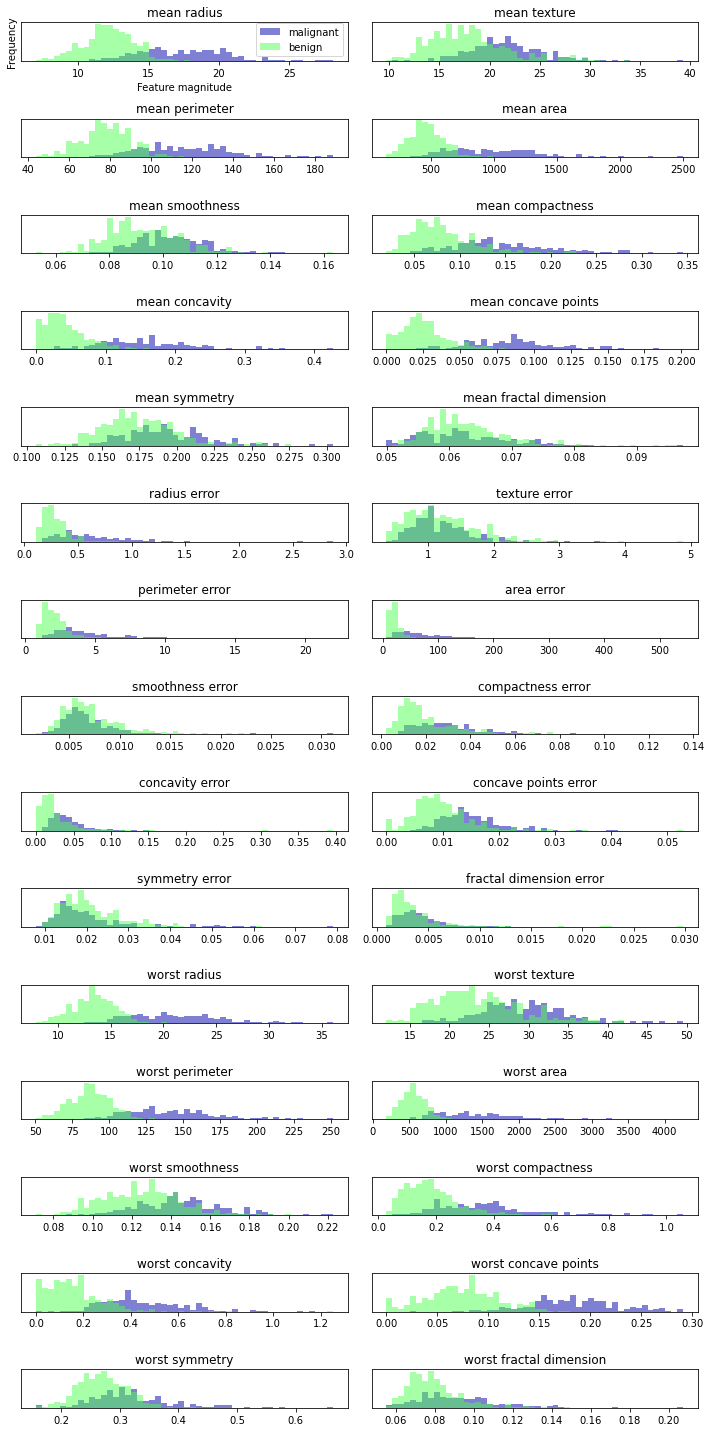

In [5]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

O plot acima ajuda muito a viualizar as diferenças entre a distribuição dos características das duas classes. O problema é que histogramas não mostram nada sobre as interações entre as diferentes features e o que isso significa para cada classe. Vamos aplicar o PCA para reduzir o número de features e poder plotar.
<br>

Antes de usar o PCA, é necessário escalonar os dados para que cada feature tenha variância unitária (usando o `StandardScaler`):

In [6]:
# scalling usando standardscaler
from sklearn.preprocessing import StandardScaler

scaled_X_data = StandardScaler().fit_transform(cancer.data)  

In [7]:
# aplicando o pca
from sklearn.decomposition import PCA

# para plotar um scatter plot, vamos utilizar apenas dois componentes
pca = PCA(n_components = 2).fit(scaled_X_data)

# transformar os dados e comparar as dimensões
X_pca = pca.transform(scaled_X_data)

print(X_pca.shape)
print(scaled_X_data.shape)

(569, 2)
(569, 30)


Text(0, 0.5, 'Second principal component')

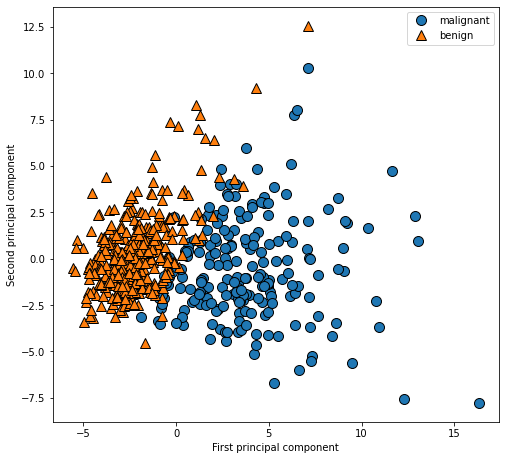

In [8]:
plt.figure(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Nesse plot dá pra ver com clareza que ambas as classes são bem separadas e que, provavelmente, até um modelo linear faria um bom trabalho separando elas. Assim como nos histogramas, podemos ver que as features da classe maligna tem a distribuição mais espalhada, ao contrário das variáveis benignas.
<br>

O problema do PCA é que o valor nas axis são bem complexos de interpretar, visto que eles são combinações das features originais (meio que correspondem pra direção em que o ponto original estava).

#### Extração de Features usando Eigenfaces
<br>

Outro uso comum do PCA é a extração de features. Por causa da forma que ele funciona, o PCA pode selecionar as features que representam melhor o modelo, sendo extremamente útil para datasets com valores altíssimos de features, como imagens. 
<br>

Para o próximo exemplo, vamos utilizar o PCA em um dataset do próprio sklearn que consiste em imagens de faces de famosos dos anos 2000 baixadas na internet. Para aumentar a velocidade do processamento, vamos usar elas em escala cinza e reduzir o tamanho.

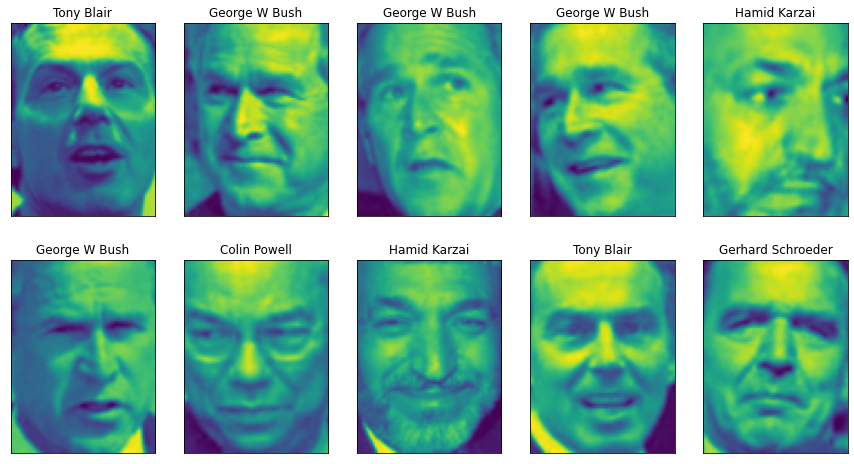

In [9]:
# importando o dataset
from PIL import Image
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

# plotando os rostos
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

Essa base de dados tem 3023 imagens, com 62 pessoas diferentes. Por causa das imagens serem baixadas da interenet, ele acaba sendo um pouco desbalanceado. Alguns dos rostos aparecem bem mais vezes que outros, como o do ex-presidente George W. Bush. 
<br>

Para resolver isso, vamos reduzir o número de imagens de cada pessoa para 50.

In [10]:
mask = np.zeros(people.target.shape, dtype = np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

Um algoritmo simples que pode oferecer uma acurácia ligeiramente decente pra esse tipo de problema é o K-NN. Assim como em data points tradicionais, ele vai procurar o rosto mais parecido de acordo com cada pixel. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)

print(f"Test set score of 1-nn: {knn.score(X_test, y_test)}")

Test set score of 1-nn: 0.3854748603351955


Considerando que temos 62 classes diferentes e simplemente chutar retornaria por volta de 0,015 de acurácia, 0,38 não é nem de longe um score ruim. Ainda assim, não podemos afirmar que é um score excelente também. 
<br>

Diferente de um ser humano, que vê a imagem como um todo, os **algoritmos olham para a imagem de acordo com cada um dos seus pixels**. Uma mesma pessoa com iluminação e expressão diferente complica muito pra um algoritmo que procura e compara checando por valores parecidos. 
<br>

É aí que o PCA entra. Por fazer a redução da imagem combinando múltiplas features, cada valor corresponde à multiplos pontos na imagem original. Isso facilita a identificação de um traço físico em um valor. Para essa task, o parâmetro `whiten` deve ser definido como True (ele rescalona os componentes principais para ter a mesma escala - exemplo abaixo).

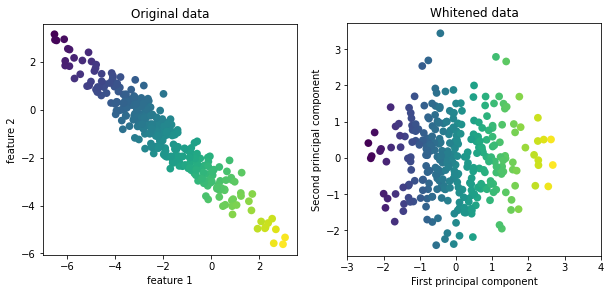

In [12]:
mglearn.plots.plot_pca_whitening()

In [13]:
# Selecionando apenas os 100 primeiros principais componentes
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# instanciando e avaliando o modelo
knn_pca = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)

print(f"Test set score of 1-nn: {knn_pca.score(X_test_pca, y_test)}")

Test set score of 1-nn: 0.4245810055865922


Obtivemos uma melhora de 4% na acurácia, comprovando nossa intuição que os componentes principais seriam uma representação melhor para a imagem. Usando uma função do livro, podemos observar como as imagens estão sendo lidas pelo modelo observando cada um dos componentes:

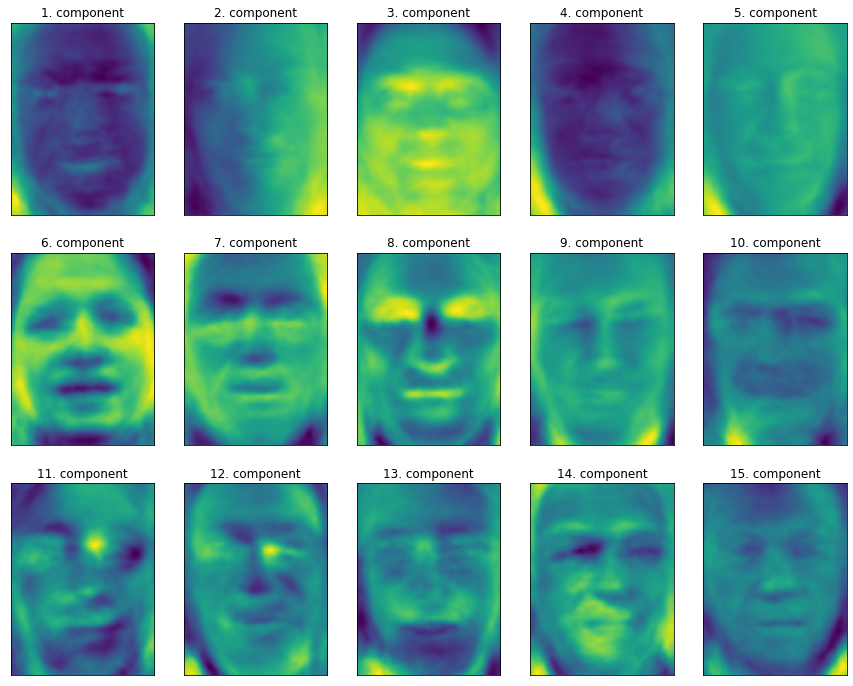

In [14]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
    cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

Pode-se imaginar também que a PCA é uma soma ponderada (com coeficientes desconhecidos) dos diversos componentes que se aproxima do valor da imagem verdadeira. O método `inverse_transform` faz o retorno dos PCs para a dimensão original. Como podemos verificar no exemplo disponibilizado na API do livro, quanto maior o númeor de componentes (até o máximo de n_pixels = n_componentes, sem perda de qualidade alguma), mais próximo ele consegue chegar:

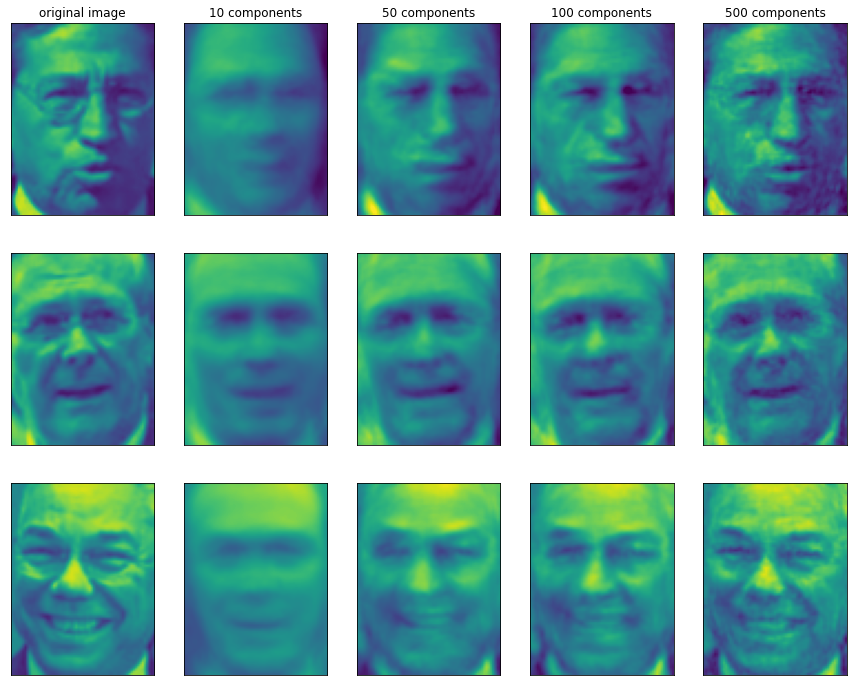

In [15]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

### Fatoração de matriz não negativa (NMF)



A **fatoração de matriz não negativa** é outra forma de algoritmo não supervisionado que funciona bem para extrair features importantes. Funciona de forma similar ao PCA, podendo ser usado também como uma forma de reduzir as dimensões de um dataset. 
<br>

A diferença do PCA é a forma com que os componentes são selecionados:
* No PCA, os compontentes tinham que ser **ortogonais entre eles** e precisavam **explicar bem a variância dos dados**. Além disso, os componentes são ordenados e eram os mesmos independente do número de componentes selecionados.
* No NMF, precisamos de componentes e coeficientes não negativos. Diminuir o número de componentes muda a forma como eles são calculados.
<br>

O processo de decompor os dados em uma soma ponderada não negativa facilita muito o trabalho com dados criados a partir de adição de diferentes fontes independentes, como é o caso de música multi-instrumental ou múltiplas pessoas falando em apenas um áudio.

C:\Users\bueni\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


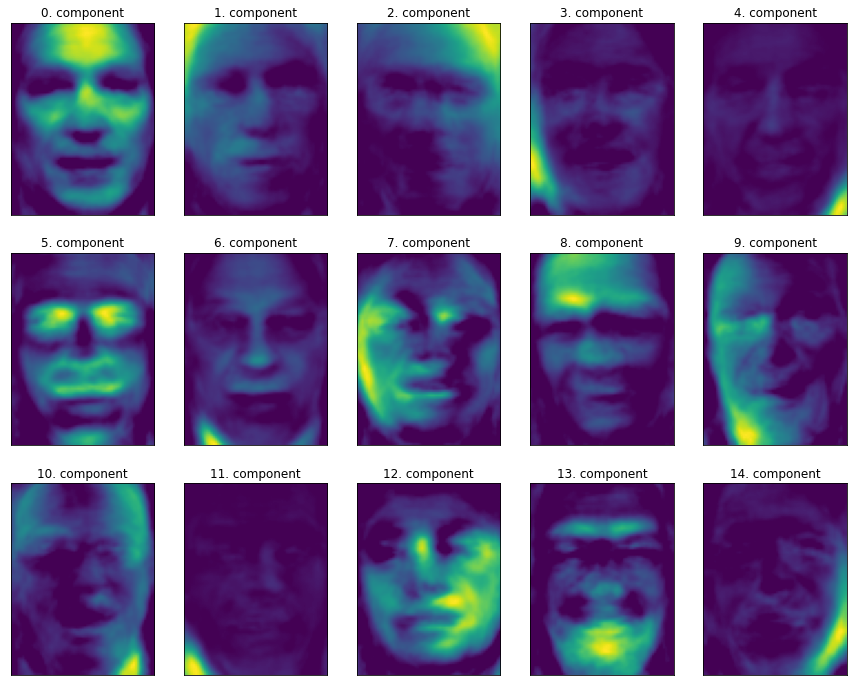

In [16]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"{i}. component")

### Manifold Learning usando t-SNE

Enquanto podemos utilizar o PCA para realizar visualizações em datasets de grandes dimensões, existe uma classe de algoritmos específicos para visualização chamandos de **manifold learning** que permitem mapeamentos muito mais complexos dos dados (e, consequentemente, melhores visualizações).
<br>

Como esses algoritmos são usados principalmente para visualização, não é muito comum usar eles para gerar mais de duas features. Além disso, os dados gerados normalmente não servem muito bem para a aplicação em modelos de ML supervisionado, sendo mais usados na fase de exploração dos dados.
<br>

A ideia por trás do t-SNE é **encontrar uma representação 2D que preserve as distâncias entre os data points da melhor maneira possível**, dando ainda mais enfase para data points vizinhos. Para entendermos melhor, vamos aplicar o algoritmo no dataset **digits**, do próprio scikit-learn, e comparar as visualizações feitas utilizando o PCA (com o número de componentes = 2) e o t-SNE.

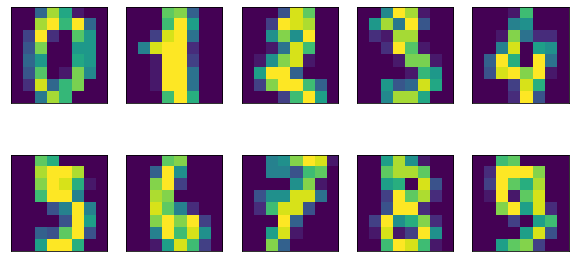

In [17]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

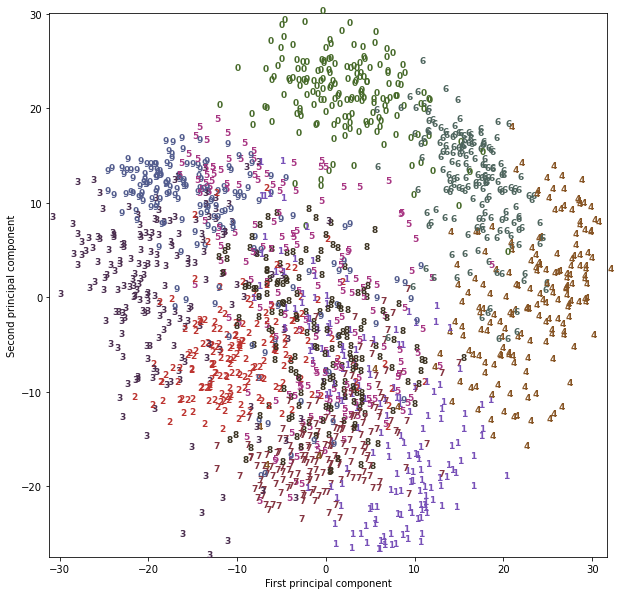

In [18]:
# Intanciando o modelo PCA
pca = PCA(n_components=2)
pca.fit(digits.data)

# aplicando a transformações dos digitos -> 2 componentes
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    #plotando o próprio digíto no local
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Text(0, 0.5, 't-SNE feature 1')

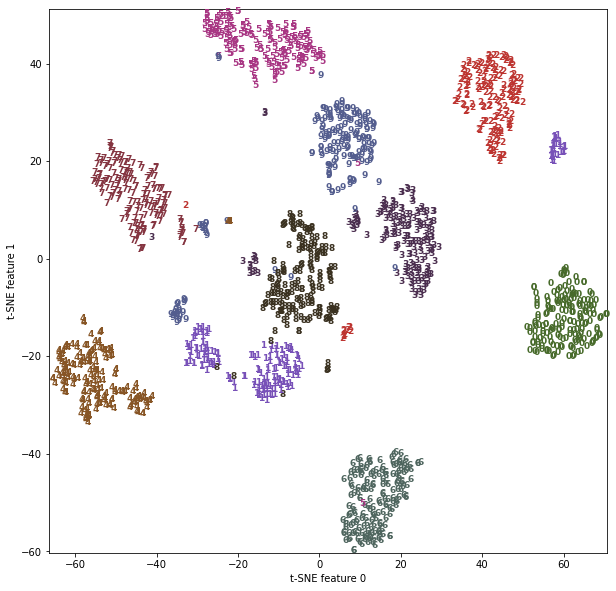

In [19]:
from sklearn.manifold import TSNE

# instanciando o t-SNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    #plotando o próprio digíto no local
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

A diferença no resultado é bem visível. No t-SNE, as classes ficam claramente agrupadas (com exceção de pequenos grupos do número 1 e do número 9) em clusters densos. Vale lembrar que esse método é **não-supervisionado**, então ele não teve nenhum acesso às labels dos números (elas foram adicionadas no plot). 
<br>

## Clustering

**Clustering é a tarefa de separar o dataset em grupos** (chamados de clusters). O objetivo é separar os dados de tal forma que os data points em um certo **cluster** sejam similares e diferentes daqueles em outros **clusters**.
<br>

Assim como os algoritmos de classificação supervisionada, os algoritmos de cluster atribuem um número para cada data point, indicando o cluster que ele pertence.

### K-Means Clustering

Um dos algoritmos mais simples e mais usados. Ele tenta achar **cluster centers** que são representativos para certas *regiões* dos dados. Ele funciona iterando em dois passos:
* Atribuindo cada data point a um cluster center;
* Mudando a posição daquele cluster center para que esteja na média dos datapoints que foram atribuídos a ele.
<br>

O algoritmo para de rodar quando não ocorre mais mudança nas iterações. Vamos observar o funcionamento dele num dataset simples e sintético:

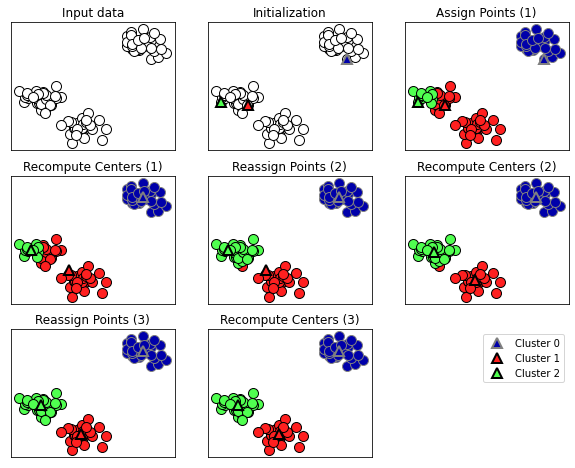

In [20]:
mglearn.plots.plot_kmeans_algorithm()

Após o modelo ser treinado, podemos inserir novos data points que serão atribuídos ao cluster mais próximo. Utilizando uma das funçoes do livro, podemos inclusive verificar os limites de decisão do algoritmo no dataset acima:

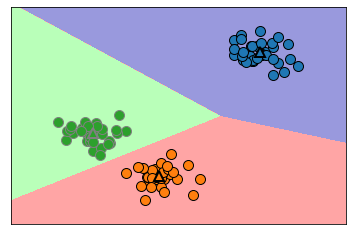

In [21]:
mglearn.plots.plot_kmeans_boundaries()

Utilizar o K-means para clusterização é bem simples usando o scikit-learn. Assim como outros modelos simples, instanciamos o algoritmo e fitamos o dataset. Depois do fit, podemos checar as labels atribuídas a cada data point usando o atributo `.labels_`.
<br>

Vamos usar o dataset sintético gerado pelo próprio scikit-learn para aplicar o modelo:

In [22]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=0)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [23]:
# Como foi definido n_clusters = 3, esperamos valores de 0 a 2

kmeans.labels_

array([1, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 1, 1, 2,
       2, 2, 1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0])

In [24]:
# Assim como modelos supervisionados, podemos usar o model.predict() para prever os valores em um novo dataset

print(kmeans.predict(X))

[1 2 1 0 0 2 0 0 1 2 2 2 1 2 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 2 1 1 2 0 2 2
 1 1 0 0 1 1 2 2 2 1 1 0 0 2 1 2 1 0 0 1 1 2 1 1 0 0 0 0 1 2 0 1 2 0 1 0 1
 2 2 2 2 0 1 2 2 1 2 2 2 2 2 1 2 1 1 0 0 0 0 2 2 0 0]


Fica fácil de enxergar a similaridade de algoritmos de clusterização e de classificação. Ainda assim, devemos lembrar que essas classificações dadas pelo algoritmo de clusterização não existem previamente e, consequentemente, não tem significado real *a priori*. 
<br>
Para que as labels façam sentido, precisamos verificar o dataset e os resultados da clusterização e tirar informações dali. A única coisa que o algoritmo nos diz é que pontos com a mesma label são similares de alguma forma.
<br>

Vamos plotar o training set com os clusters definidos pelo algoritmo e as labels verdadeiras:

Text(0, 0.5, 'Feature 1')

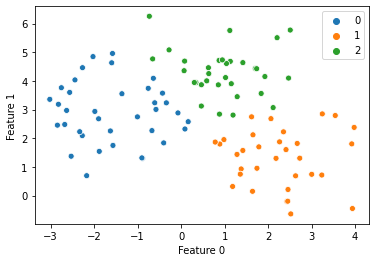

In [25]:
import seaborn as sns

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = kmeans.labels_, palette = 'tab10');
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

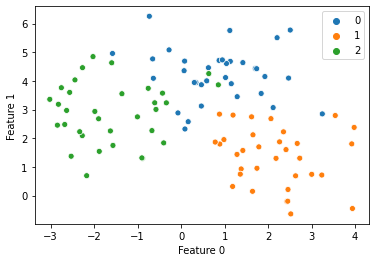

In [26]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, palette = 'tab10');
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Aqui fica claro que o algoritmo fez um bom trabalho. Além disso, mostra também o que foi dito logo acima: **as labels dos clusters não tem um real significado até você dar ele pra elas**. O algoritmo definiu o valor 0 para o grupo mais à esquerda, enquanto ele possuía label 2 no dataset. Isso não significa que o algoritmo estava errado, só que ele não teve conhecimento do nome das labels.

#### Problemas ao utilizar o K-Means

Devido à forma que o k-means funciona (clusterizando apenas pelo centro de cada cluster), ele é incapaz de reconhecer formas mais complexas. Além disso, ele espera que os clusters tenham uma área parecida, o que pode complicar em alguns datasets.
<br>

O algoritmo também assume que todas as direções são igualmente importantes para cada cluster. Se um dataset de duas dimensões é bem esticado na diagonal, por exemplo, o k-means não se consegue lidar direito.

Text(0, 0.5, 'Feature 1')

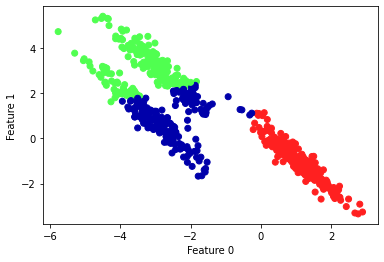

In [27]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transformando os dados para ficarem esticados na diagonal
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# rodando o algoritmo em 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plotando
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

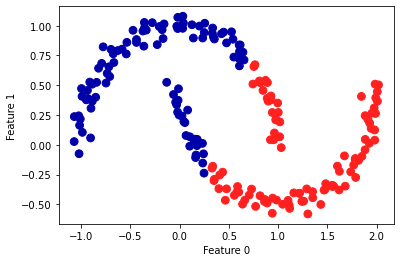

In [28]:
# criando um dataset em formato mais complexo
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rodando o algoritmo para 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plotando
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Agglomerative Clustering

Refere-se a uma coleção de algoritmos de clusterização que se constroem em cima dos mesmos principios:
* Começa declarando para **cada dada point seu próprio cluster**;
* **Une os dois clusters mais similares iterativamente**, até alguma condição ser satisfeita.
<br>

No scikit-learn, essa condição é definida pelo número de clusters passados ao algoritmo. Outro parâmetro a ser definido **é o critério que julga a similaridade dos clusters**, podendo ser escolhido entre três: 
<br>
* ward:
    * É a forma padrão, escolhe os clusters de forma que a variância entre TODOS os clusters aumente o minímo com a junção. Acaba causando clusters com tamanho parecido.

* average:
    * Une os clusters que tenham a menor distância média entre os data points que já fazem parte dos clusters.

* complete
    * Também é conhecido como "maximum linkage". Une os dois clusters que tiverem a menor distância máxima entre seus pontos. 
<br>

`ward` funciona na maioria dos datasets e é o que vamos utilizar nos exemplos. Se você já tiver o conhecimento prévio de que o tamanho dos clusters esperados é desbalanceado, as outras opções podem funcionar melhor.

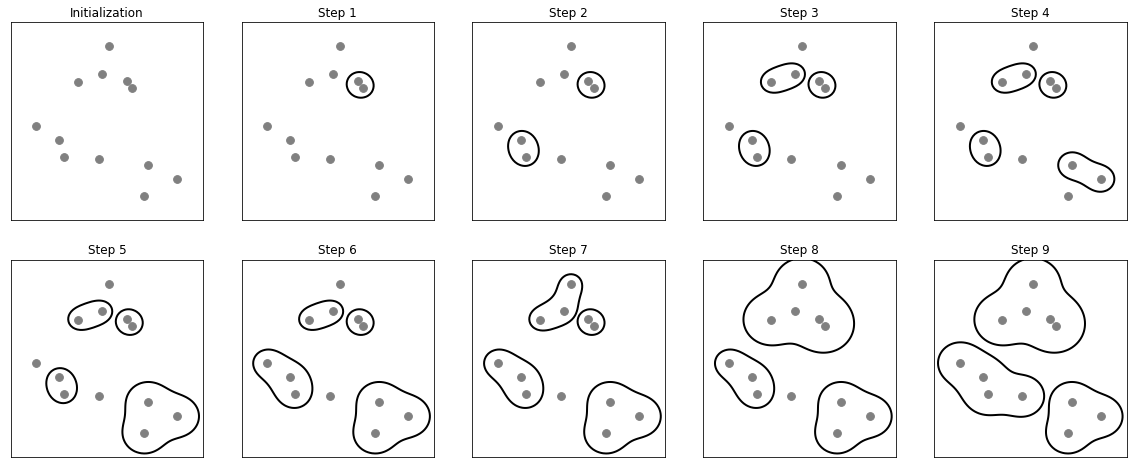

In [29]:
mglearn.plots.plot_agglomerative_algorithm()

Pela forma que o algoritmo funciona, **ele não consegue prever novos data points depois de treinado** e não possui o `predict()`. Para construir o modelo, devemos utilizar um método chamado `fit_predict()`.

Text(0, 0.5, 'Feature 1')

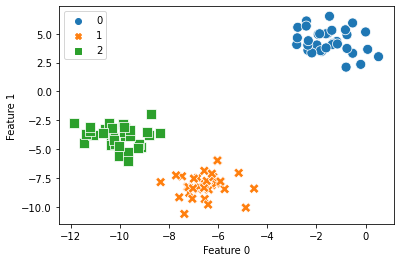

In [30]:
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = assignment, style = assignment, palette = 'tab10', s = 100)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Clustering hierárquico e dendrogramas

Algoritmos de clusterização aglomerativa produzem o que é conhecido como **clusterização hierárquica**. Como o processo de clusterização ocorre iterativamente, podemos observar o processo de um data point com seu cluster singular se juntando a outros data points e formando alguns poucos clusters finais. 
<br>

Uma forma interessante de observar esse processo é utilizar dendrogramas. Infelizmente, o scikit-learn ainda não oferece essa funcionalidade, mas o SciPy sim. 

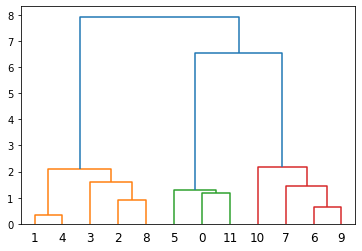

In [31]:
from scipy.cluster.hierarchy import dendrogram, ward

#iniciando com um dataset pequeno para que possamos observar cada datapoint
X, y = make_blobs(random_state=0, n_samples=12)

# aplicamos o clustering 'ward' na array X. a funçao do scipy retorna uma 
# array que especifica as distancias transpostas quando performamos o clustering
linkage_array = ward(X)

dendrogram(linkage_array);

A função do SciPy permite a visualização de cada um dos data points na parte de baixo e, de acordo com a alutra da união, a **ordem em que os clusters foram agrupados e o quão perto estavam os clusters**. Quando os clusters verde e vermelho se juntam em um só, podemos ver que eles estavam longe um do outro por causa da altura da união.
<br>

Infelizmente, assim como o K-means, o **clustering aglomerativo também fracassa quando precisa criar formas complexas**.

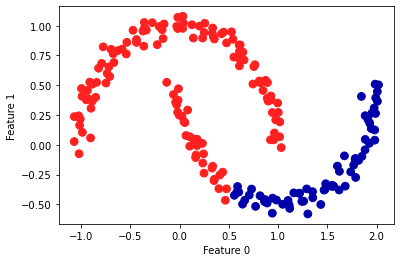

In [32]:
# criando um dataset em formato mais complexo
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

# plotando
plt.scatter(X[:, 0], X[:, 1], c=assignment, cmap=mglearn.cm2, s=60);

plt.xlabel("Feature 0");
plt.ylabel("Feature 1");

## DBSCAN

O terceiro algoritmo que vamos estudar nesse capítulo é o **DBSCAN** ("density-based spatial clustering of applications with noise"). As principais **vantagens** do uso desse algoritmo são:
* Não precisa de um número de clusters definido.
* Lida bem com clusters em formatos complexos.
* Identifica data points que não são parte de nenhum cluster.

Sua principal **desvantagem** é **velocidade inferior** ao k-means e ao agglomerative clustering, ainda que escale bem a datasets grandes. 
<br>

O algoritmo funciona **identificando data points que estão localizados em regiões lotadas no hiperespaço de features**, onde muitos data points estão próximos. A ideia por trás do DBSCAN é criar um cluster dessa regiões densas de data points, separando das regiões que são relativamente vazias. Esses data points que estão localizados nas regiões densas são chamados de *core samples* e são afetados por dois parâmetros do algoritmo: `min_samples` e `eps`. Se tiver pelo menos `min_samples` data points em uma distância `eps` de um certo data point, ele é classificado pelo algoritmo como um *core sample*. Core samples que são próximos (até o máximo de `eps`) são agrupados no mesmo cluster pelo DBSCAN.
<br>

Inicialmente, é selecionado algum ponto arbitrário no dataset. Então, são encontrados todos os pontos próximos (distância max `eps`). Se tiverem menos que `min_samples` pontos por perto, aquele ponto é classificado como **noise** , significando que ele não pertence a nenhum cluster. Caso tenha, o ponto é classificado como core sample e lhe é atribuída uma label. Isso ocorre diversas vezes, agrupando core samples e pontos próximos em um mesmo cluster e procurando outros core samples quando os próximos acabam.
<br>

Vamos aplicar o DBSCAN usando o scikit-learn.

In [33]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print(f"Cluster memberships {clusters}")

Cluster memberships [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Usando a parâmetrização padrão, todos os data points foram classificados como **noise** (label -1). Isso ocorre porque a parametrização não é adequada para datasets pequenos. Vamos observar como valores diferentes na parametrização podem afetar o resultado do DBSCAN:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


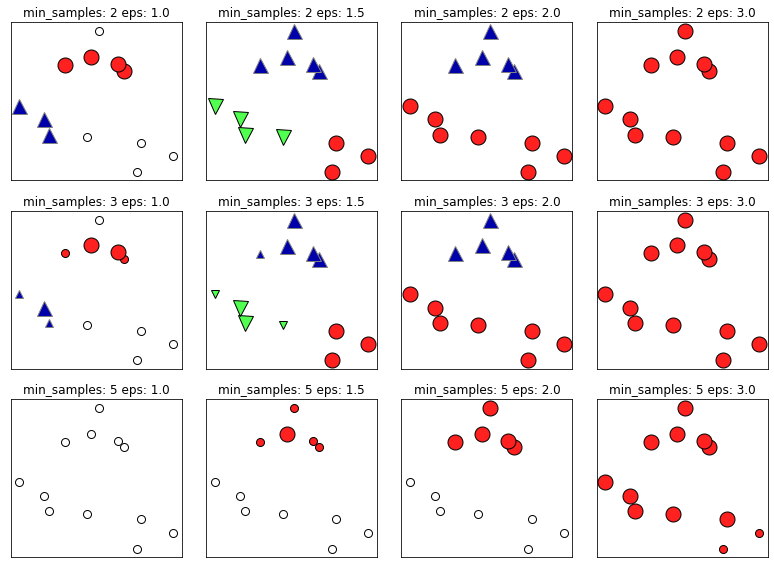

In [34]:
mglearn.plots.plot_dbscan()

Dá pra ver com clareza que quanto maior o valor de `min_samples` ou menor o valor da distância `eps`, mais propenso o algoritmo vai estar de definir os data points como **noise**, sem dar label alguma. Caso a distância `eps` seja muito grande, o modelo acaba agrupando todo e qualquer ponto como um grupo só. 
<br>

Apesar de que o DBSCAN não necessite de um valor definido de clusters, a parâmetrização é que acaba definindo isso. 

## Comparando e Avaliando Algoritmos de Clusterização

Uma das tarefas mais difíceis ao trabalhar com modelos de clusterização é a dificuldade de avaliação dos resultados do modelo e o benchmark entre diferentes algoritmos. Caso o dataset possua labels definidas (como é o caso dos datasets sintéticos que estamos usando como exemplo acima), podemo utilizar métricas de avaliação como a *adjusted rand index* (ARI) ou a *normalized mutual information* (NMI) da mesma forma que utilizamos a acurácia. 
<br>

Abaixo, comparamos os resultados dos modelos no dataset sintético `make_moons` do scikit-learn:

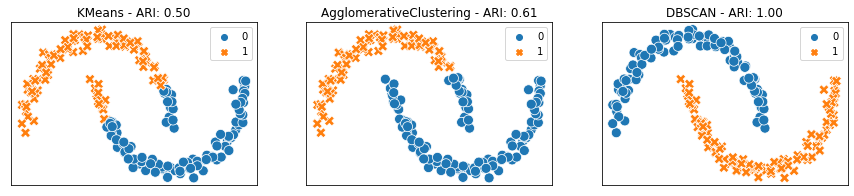

In [36]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# escalonamento dos dados
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 3, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

# algotimos de clusterização
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    
    sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters,
                    style = clusters, palette = 'tab10', s = 100, ax = ax)
    
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {adjusted_rand_score(y, clusters):.2f}")



Utilizando as labels, fica fácil de descobrir a "acurácia" do modelo. Não utilizamos a função `accuracy_score` em modelos de clusterização pois as labels definidas pelo algoritmo não possuem significado algum (DBSCAN recebeu um score perfeito, mas caso as labels corretas fossem trocadas teria ficado com score = 0 na acurácia, mesmo que isso não impacte o desempenho do modelo). 
<br>

Para avaliar modelos treinados em datasets que não possuem label prévia (o que normalmente é o caso em algoritmos de clusterização), pode-se usar métricas como o *silhouette coeffiecient*. No entanto, métricas como essa não tendem a funcionar tão bem na prática. O *silhouette coefficient* **computa o quão compacto é um cluster e, por mais que isso até seja bom, não permite formas mais complexas**.
<br>

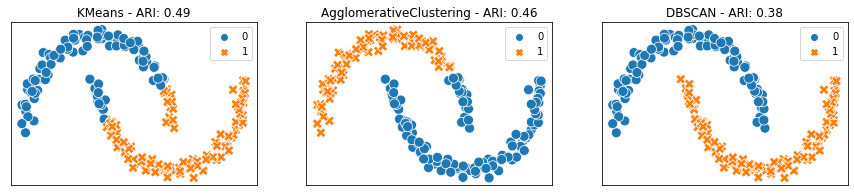

In [37]:
from sklearn.metrics.cluster import silhouette_score

fig, axes = plt.subplots(1, 3, figsize=(15, 3), subplot_kw={'xticks': (), 'yticks': ()})

for ax, algorithm in zip(axes, algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    
    sns.scatterplot(x = X_scaled[:, 0], y = X_scaled[:, 1], hue = clusters,
                    style = clusters, palette = 'tab10', s = 100, ax = ax)
    
    ax.set_title(f"{algorithm.__class__.__name__} - ARI: {silhouette_score(X_scaled, clusters):.2f}")

Para um ser humano que está vendo de fora, é trivial que o DBSCAN tenha se conseguido um resultado superior aos outros dois algoritmos. No entanto, a métrica mostra o contrário. 

## Aplicando os Algoritmos de Clusterização ao Dataset de rostos

In [38]:
# vamos decompor o dataset de rostos -> eigenfaces com 100 components 
# isso torna o processo mais rápido computacionalmente 
pca = PCA(n_components=100, whiten=True, random_state=0)

pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [42]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)

print(f"Labels únicas: {np.unique(labels)}")
print(f"Número de datapoints por cluster: {np.bincount(labels + 1)}")

Labels únicas: [-1]
Número de datapoints por cluster: [714]


Usando a parâmetrização padrão, o DBSCAN não retorna nenhum cluster, apenas **noise**. Vamos aumentar a distância mínima `eps` e reduzir o valor padrão de `min_samples`.

In [43]:
dbscan = DBSCAN(min_samples = 3, eps = 15)
labels = dbscan.fit_predict(X_pca)

print(f"Labels únicas: {np.unique(labels)}")
print(f"Número de datapoints por cluster: {np.bincount(labels + 1)}")

Labels únicas: [-1  0]
Número de datapoints por cluster: [ 20 694]


Conseguimos reduzir de maneira expressiva o número de fotos consideradas noise pelo DBSCAN. Agora são tão poucas que podemos observa-las manualmente e tentar entender os motivos do algoritmo:

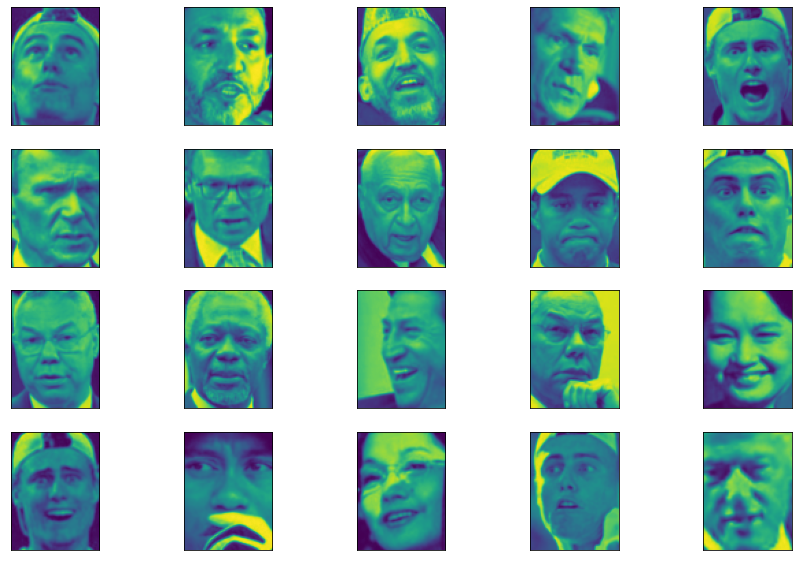

In [47]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 10))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

Podemos chutar os motivos do algoritmo ter considerado essas imagens como noise. Alguns estão utilizando boné ou chapéu, tem um cara com a mão na boca e vários que usam óculos. Além disso, algumas delas contam com pessoas olhando muito para o lado ou estão com zoom muito forte.
<br>

Esse tipo de análise é chamada de **outlier detection**. Se esse exemplo fosse uma aplicação real, teríamos que tentar encontrar mais dados/melhores dados ou cortar melhor as imagens para elas se tornarem mais homogêneas. Não tem muito como resolver os problemas do boné e da mão na boca, mas é interessante saber como os algoritmos podem se portar diante desses exemplos. 
<br>

Podemos utilizar o eps em valores diferentes também, na tentativa de achar clusters diferentes:

In [50]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print(f"\neps={eps}")
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print(f"Labels únicas: {np.unique(labels)}")
    print(f"Número de datapoints por cluster: {np.bincount(labels + 1)}")


eps=1
Labels únicas: [-1]
Número de datapoints por cluster: [714]

eps=3
Labels únicas: [-1]
Número de datapoints por cluster: [714]

eps=5
Labels únicas: [-1  0]
Número de datapoints por cluster: [710   4]

eps=7
Labels únicas: [-1  0  1  2]
Número de datapoints por cluster: [695  13   3   3]

eps=9
Labels únicas: [-1  0  1]
Número de datapoints por cluster: [478 233   3]

eps=11
Labels únicas: [-1  0]
Número de datapoints por cluster: [174 540]

eps=13
Labels únicas: [-1  0]
Número de datapoints por cluster: [ 54 660]


O `eps` = 7 foi o que mais trouxe número de clusters diferentes, apesar de ele tratou bastante dos dados como noise. Vamos dar uma olhada nas fotos que foram clusterizadas:

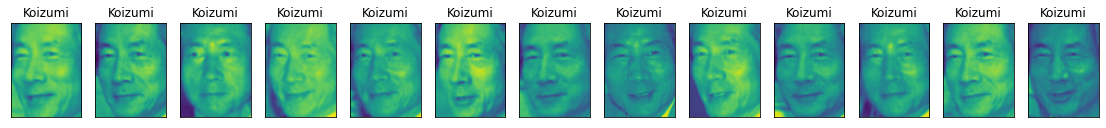

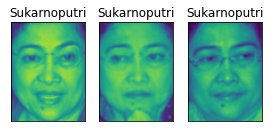

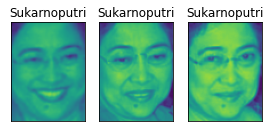

In [51]:
dbscan = DBSCAN(min_samples = 3, eps = 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize = (n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1])

In [55]:
for min_samples in [2, 3, 5, 7, 9, 11, 13]:
    print(f"\nmin_samples={min_samples}")
    dbscan = DBSCAN(eps=7, min_samples=min_samples)
    labels = dbscan.fit_predict(X_pca)
    print(f"Labels únicas: {np.unique(labels)}")
    print(f"Número de datapoints por cluster: {np.bincount(labels + 1)}")


min_samples=2
Labels únicas: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Número de datapoints por cluster: [673   2  13   2   2   2   3   2   2   2   2   3   2   2   2]

min_samples=3
Labels únicas: [-1  0  1  2]
Número de datapoints por cluster: [695  13   3   3]

min_samples=5
Labels únicas: [-1  0]
Número de datapoints por cluster: [703  11]

min_samples=7
Labels únicas: [-1  0]
Número de datapoints por cluster: [703  11]

min_samples=9
Labels únicas: [-1]
Número de datapoints por cluster: [714]

min_samples=11
Labels únicas: [-1]
Número de datapoints por cluster: [714]

min_samples=13
Labels únicas: [-1]
Número de datapoints por cluster: [714]


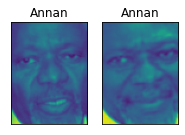

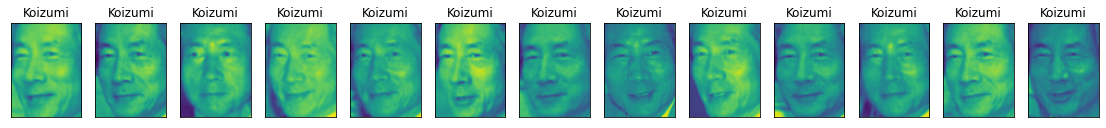

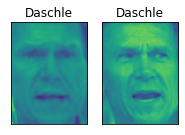

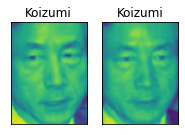

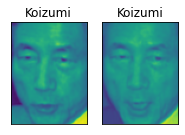

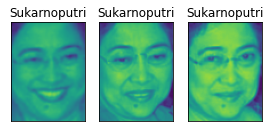

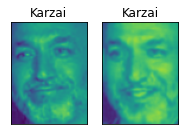

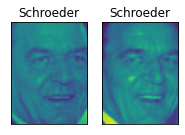

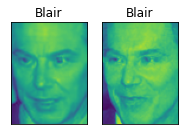

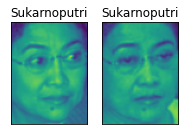

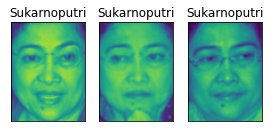

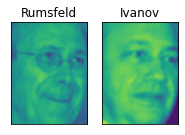

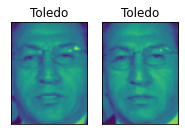

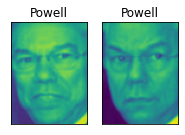

In [56]:
dbscan = DBSCAN(min_samples = 2, eps = 7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize = (n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin = 0, vmax = 1)
        ax.set_title(people.target_names[label].split()[-1])

# Referência

**An Introduction to Machine Learning with Python** by Andreas C. Müller and Sarah Guido (O’Reilly), cap. 2. Copyright 2017 Sarah Guido and Andreas Müller, 978-1-449-36941-5.